##import_libery

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime

##Load_data_price

In [15]:
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2020, 1, 1)
df = web.DataReader("ptt.bk", 'yahoo', start, end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-04,33.299999,32.299999,32.500000,33.000000,105954000.0,1.321719
2011-01-05,33.200001,32.799999,33.000000,33.200001,60858000.0,1.329729
2011-01-06,33.400002,32.900002,33.299999,33.200001,39649000.0,1.329729
2011-01-07,33.099998,32.200001,33.099998,32.200001,55332000.0,1.289677
2011-01-10,32.200001,31.600000,32.099998,31.799999,83620000.0,1.273656
...,...,...,...,...,...,...
2019-12-25,44.250000,43.750000,44.250000,44.250000,11687500.0,43.055523
2019-12-26,44.500000,44.250000,44.250000,44.500000,11117700.0,43.298771
2019-12-27,44.750000,43.500000,44.500000,44.250000,55385800.0,43.055523


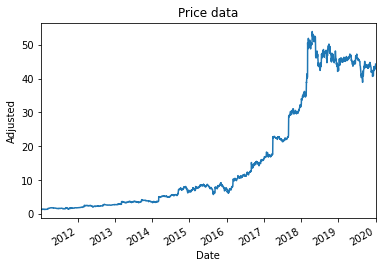

In [16]:
df['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("Price data")
plt.show()

In [17]:
df_daily_returns = df['Adj Close'].pct_change()
df_monthly_returns = df['Adj Close'].resample('M').ffill().pct_change()
df_Year_returns = df['Adj Close'].resample('Y').ffill().pct_change()
df_daily_returns.head()

Date
2011-01-04         NaN
2011-01-05    0.006061
2011-01-06    0.000000
2011-01-07   -0.030121
2011-01-10   -0.012422
Name: Adj Close, dtype: float64

In [18]:
df_monthly_returns.head()

Date
2011-01-31         NaN
2011-02-28    0.005970
2011-03-31    0.246957
2011-04-30    0.059322
2011-05-31   -0.056000
Freq: M, Name: Adj Close, dtype: float64

In [19]:
df_Year_returns

Date
2011-12-31         NaN
2012-12-31    0.517592
2013-12-31    0.314390
2014-12-31    0.851231
2015-12-31    0.138286
2016-12-31    1.150878
2017-12-31    0.962401
2018-12-31    0.349278
2019-12-31    0.000340
2020-12-31    0.034091
Freq: A-DEC, Name: Adj Close, dtype: float64

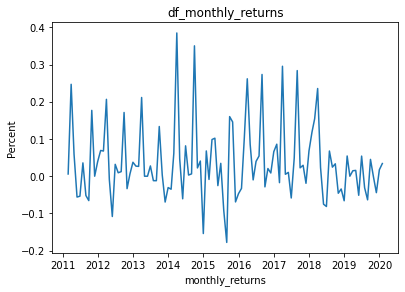

In [20]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(df_monthly_returns)
ax1.set_xlabel("monthly_returns")
ax1.set_ylabel("Percent")
ax1.set_title("df_monthly_returns")
plt.show()

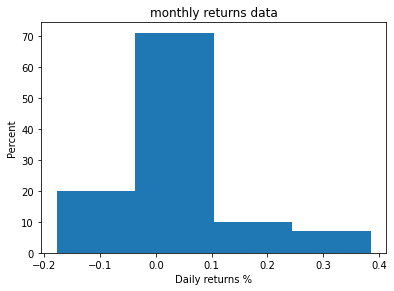

In [25]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
df_monthly_returns.plot.hist(bins = 4)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("monthly returns data")

plt.show()

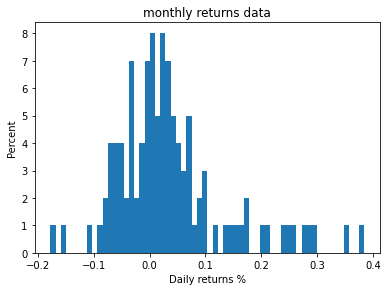

In [22]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
df_monthly_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("monthly returns data")

plt.show()

In [0]:
cum_returns = (df_daily_returns + 1).cumprod()

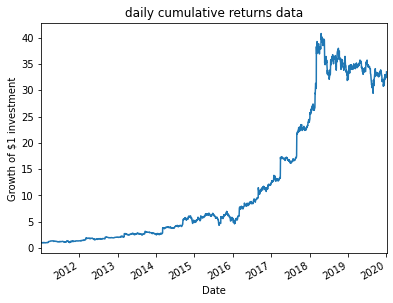

In [28]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("daily cumulative returns data")
plt.show()

In [31]:
from google.colab import drive
drive.mount('drive')

df_Year_returns.to_csv('Year returns.CSV')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.
